In [1]:
# import library
import numpy as np  # Mengimpor library NumPy dan memberi alias "np" untuk memudahkan penggunaan selanjutnya.
import matplotlib.pyplot as plt  # Mengimpor library Matplotlib untuk visualisasi data dan memberi alias "plt".
from scipy import stats  # Mengimpor modul "stats" dari library SciPy untuk statistik.
import seaborn as sns  # Mengimpor library Seaborn untuk visualisasi data statistik.

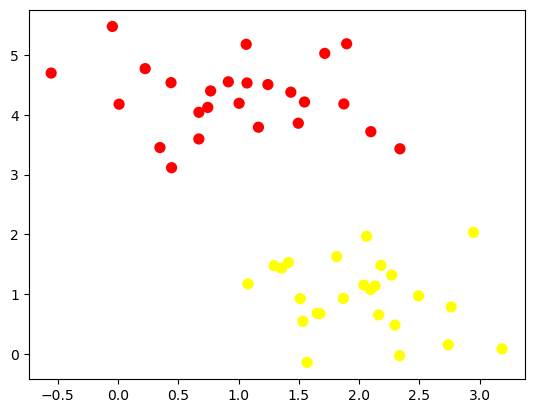

In [2]:
from sklearn.datasets import make_blobs  # Mengimpor fungsi "make_blobs" dari library scikit-learn (sklearn) untuk membuat data titik-titik berkelompok.
X, y = make_blobs(n_samples=50, centers=2,  # Membuat 50 sampel data dengan 2 pusat (centers).
                  random_state=0, cluster_std=0.60)  # Menentukan random seed dan deviasi standar cluster.

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat scatter plot dari data dengan sumbu x dari kolom pertama (X[:, 0]), sumbu y dari kolom kedua (X[:, 1]), warna titik-titik sesuai dengan label y (c=y), ukuran titik-titik 50 (s=50), dan peta warna 'autumn'.


(-1.0, 3.5)

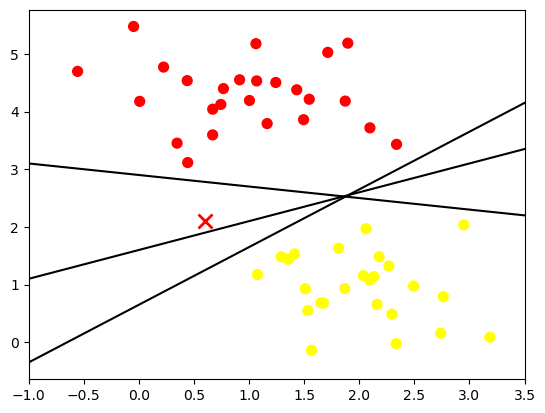

In [3]:
xfit = np.linspace(-1, 3.5)  # Membuat array linear space "xfit" dari -1 hingga 3.5 sebagai nilai x yang akan digunakan untuk plotting.

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Menampilkan scatter plot dengan data yang sama seperti sebelumnya.

plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)  # Menambahkan tanda 'x' berwarna merah pada koordinat (0.6, 2.1) dengan ukuran 10 dan ketebalan tepi 2.

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:  # Melakukan iterasi pada pasangan nilai m dan b.
    plt.plot(xfit, m * xfit + b, '-k')  # Menambahkan garis lurus dengan persamaan m * xfit + b ke plot dengan warna hitam ('-k').

plt.xlim(-1, 3.5)  # Mengatur batas sumbu x pada rentang -1 hingga 3.5.


In [4]:
from sklearn.svm import SVC  # Mengimpor class "SVC" (Support Vector Classifier) dari library scikit-learn (sklearn).

model = SVC(kernel='linear', C=1E10)  # Membuat model Support Vector Classifier dengan kernel linear (linier) dan parameter C yang sangat besar (1E10, atau 10^10).
model.fit(X, y)  # Melatih model menggunakan data X dan label y.


SVC(C=10000000000.0, kernel='linear')

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """
    Fungsi ini digunakan untuk menampilkan batas keputusan dari model Support Vector Classifier (SVC).

    Parameters:
    - model: Objek model SVC yang telah dilatih.
    - ax: Objek axes dari plot, jika tidak ditentukan, maka akan menggunakan axes default.
    - plot_support: Menentukan apakah akan menampilkan support vectors, defaultnya True.

    """
    if ax is None:
        ax = plt.gca()  # Jika objek axes tidak diberikan, maka menggunakan axes default.
    xlim = ax.get_xlim()  # Mengambil batas sumbu x dari axes.
    ylim = ax.get_ylim()  # Mengambil batas sumbu y dari axes.

    # Membuat grid untuk evaluasi model.
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)  # Menghitung fungsi keputusan model dan menghasilkan bentuk yang sesuai.

    # Plot batas dan margin.
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors jika plot_support=True.
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')  # Menampilkan support vectors sebagai titik-titik berukuran besar dengan tepi hitam dan isi kosong.
    ax.set_xlim(xlim)  # Mengatur batas sumbu x.
    ax.set_ylim(ylim)  # Mengatur batas sumbu y.


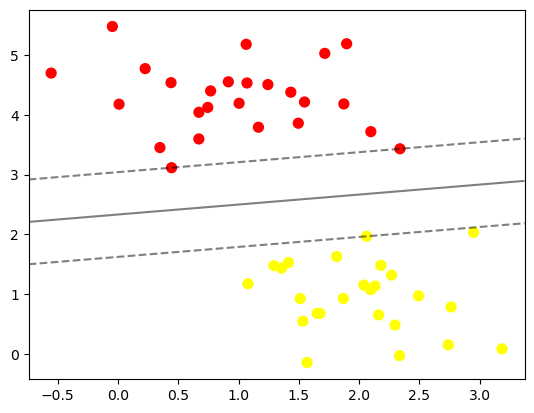

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# Menampilkan scatter plot dari data X dengan sumbu x dari kolom pertama (X[:, 0]), sumbu y dari kolom kedua (X[:, 1]),
# pewarnaan titik-titik berdasarkan label y (c=y), ukuran titik-titik 50 (s=50), dan peta warna 'autumn'.

plot_svc_decision_function(model)
# Memanggil fungsi plot_svc_decision_function untuk menampilkan batas keputusan dari model SVC yang telah dilatih.


In [7]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

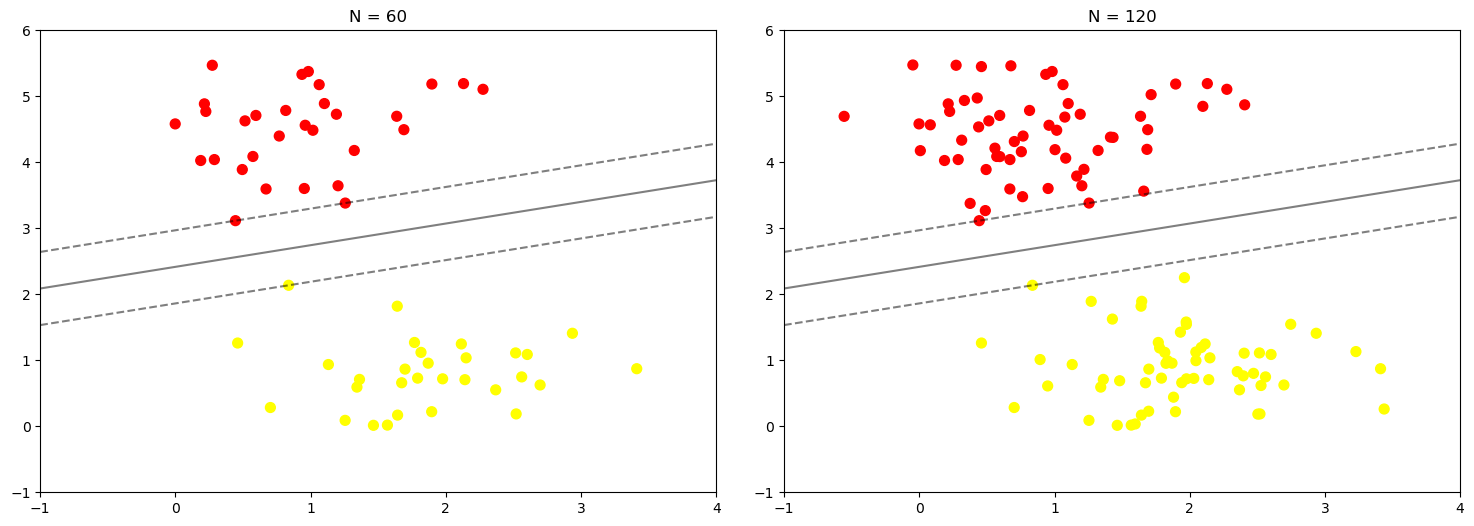

In [8]:
def plot_svm(N=10, ax=None):
    # Membuat data menggunakan make_blobs dengan jumlah sampel 200 dan 2 pusat (centers).
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    
    # Mengambil hanya sebagian data (N) untuk latihan.
    X = X[:N]
    y = y[:N]
    
    # Membuat model Support Vector Classifier (SVC) dengan kernel linear dan parameter C yang sangat besar.
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    
    # Memanggil fungsi plot_svc_decision_function untuk menampilkan batas keputusan dari model SVC.
    plot_svc_decision_function(model, ax)

# Membuat subplot dengan dua kolom.
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Memanggil fungsi plot_svm untuk dua kasus berbeda (N = 60 dan N = 120) dalam dua subplot yang berbeda.
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))  # Menampilkan judul subplot berdasarkan jumlah sampel (N).


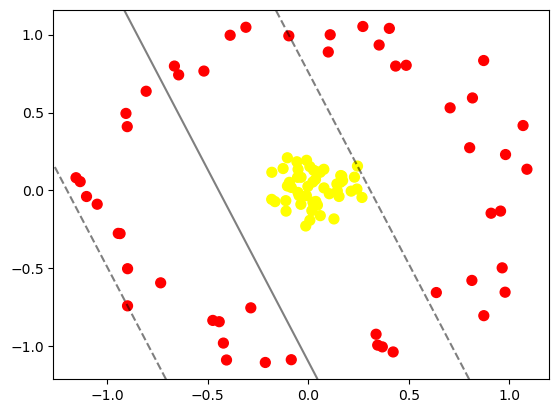

In [9]:
# Mengimpor library dan membuat data lingkaran.
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

# Membuat model SVC dengan kernel linear dan melatihnya dengan data lingkaran.
clf = SVC(kernel='linear').fit(X, y)

# Menampilkan scatter plot dari data dengan pewarnaan berdasarkan label.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Memanggil plot_svc_decision_function dengan plot_support=False untuk menampilkan batas keputusan tanpa support vectors.
plot_svc_decision_function(clf, plot_support=False);


In [10]:
# Menghitung nilai r menggunakan rumus eksponensial pada setiap baris data X
r = np.exp(-(X ** 2).sum(1))

In [11]:
# Mengimpor modul yang diperlukan
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# Fungsi untuk menggambar plot 3D dengan interaktivitas
def plot_3D(elev=30, azim=30, X=X, y=y):
    # Membuat subplot 3D
    ax = plt.subplot(projection='3d')
    # Menampilkan scatter plot 3D dengan warna berdasarkan kelas y
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    # Mengatur sudut pandang
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

# Membuat widget interaktif untuk mengubah sudut pandang plot 3D
interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.35220669,  0.93308115],
       [ 0.33695213, -0.92277495],
       [-0.64439143,  0.74163715],
       [ 0.07787184,  0.01630057],
       [ 0.95573991, -0.13241019],
       [ 0.02782881, -0.0911051 ],
       [-0.38843951,  0.99581378],
       [ 0.07731429,  0.13561982],
       [-0.08442479,  0.01945102],
       [ 0.1665006 ,  0.09231513],
       [ 0.05945069,  0.11660222],
       [ 0.802301  ,  0.274179  ],
       [ 0.05961203, -0.16178067],
       [ 0.04546567, -0.09400759],
       [ 0.03746401, -0.07056554],
       [-1.1339423 ,  0.05661404],
       [ 0.96382607, -0.49668486],
       [-0.94451652, -0.27550803],
       [-0.03688652, -0.08904506],
       [ 1.06765627,  0.416532  ],
       [ 0.16129796,  0.09553234],
       [ 0.14217713,  0.04193515],
       [ 0.36798937, -1.00387995],
       [-0.12519247,  0.14063657],
       [-0.44274408, -0.84231131],
       [-0.28566259, -0.75329263],
       [-0.11181989, -0.06572251],
       [

In [12]:
# Mengimpor kelas SVC (Support Vector Classifier) dari library SVM (Support Vector Machine)
# Menggunakan kernel RBF (Radial Basis Function)
# Parameter C diatur sebagai 1E6 (sebuah nilai besar) yang mengindikasikan ketidakberanian untuk mengorbankan penalti kesalahan klasifikasi
clf = SVC(kernel='rbf', C=1E6)

# Melatih model menggunakan data X dan label y
clf.fit(X, y)

SVC(C=1000000.0)

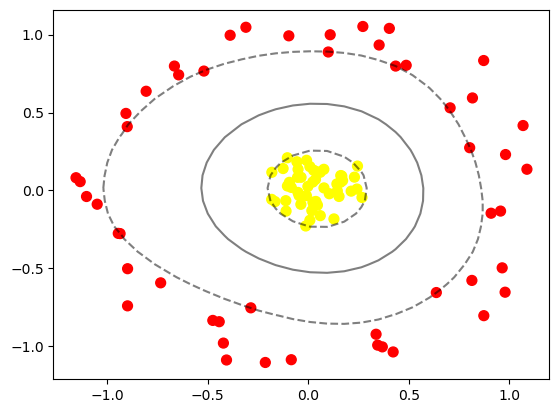

In [13]:
# Membuat scatter plot dari data dengan warna berdasarkan label y (c=y)
# Ukuran titik scatter disetel ke 50 (s=50)
# Menggunakan peta warna 'autumn' (cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Memanggil fungsi plot_svc_decision_function untuk menggambar batas keputusan dari model SVM (clf)
plot_svc_decision_function(clf)

# Menampilkan support vectors yang digunakan oleh model
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')


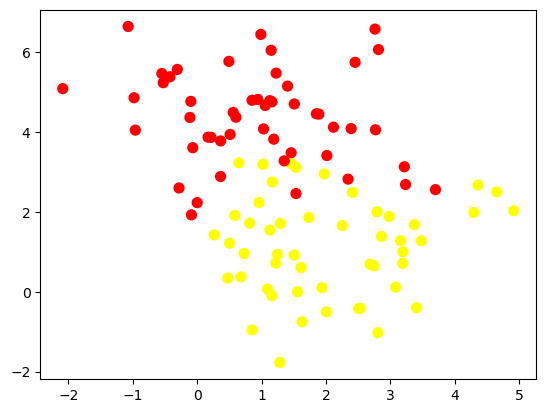

In [14]:
# Menghasilkan data sampel dengan 100 titik
# Data ini dibagi menjadi 2 pusat (centers=2)
# random_state digunakan untuk memastikan hasil yang dapat direproduksi
# cluster_std mengatur standar deviasi dari setiap cluster
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

# Membuat scatter plot dari data
# Warna titik diatur berdasarkan label y (c=y)
# Ukuran titik scatter disetel ke 50 (s=50)
# Menggunakan peta warna 'autumn' (cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


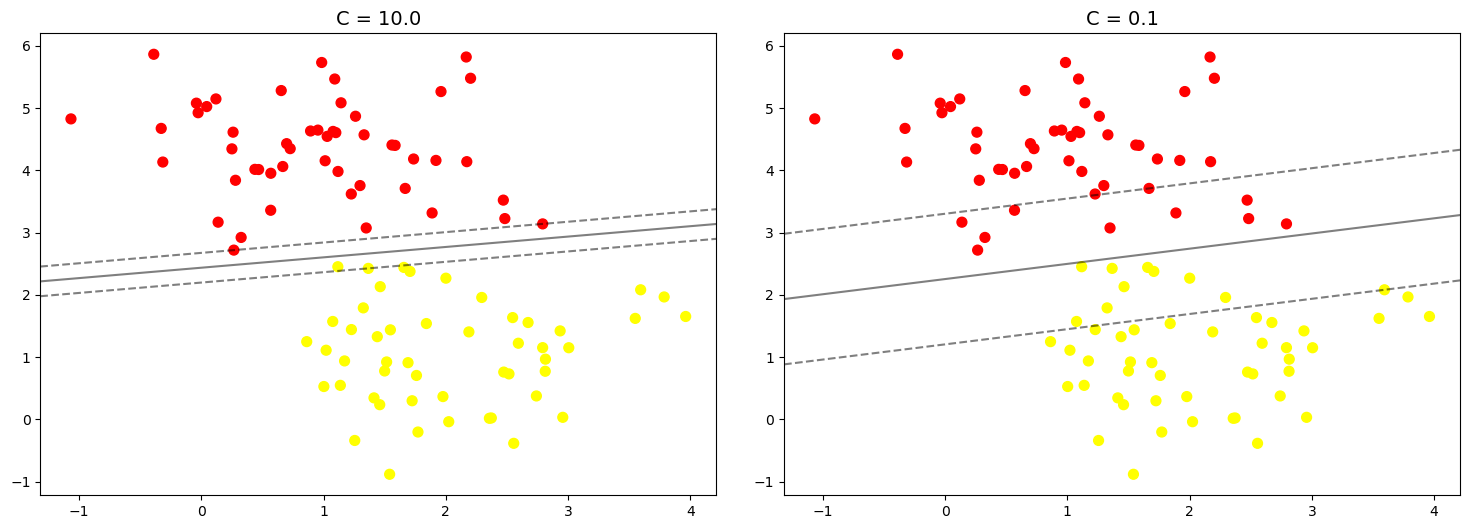

In [15]:
# Menghasilkan data sampel dengan 100 titik
# Data ini dibagi menjadi 2 pusat (centers=2)
# random_state digunakan untuk memastikan hasil yang dapat direproduksi
# cluster_std mengatur standar deviasi dari setiap cluster
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

# Membuat dua subplot (2 kolom)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Looping melalui kedua subplot dengan dua nilai berbeda untuk parameter C
for axi, C in zip(ax, [10.0, 0.1]):
    # Membuat model Support Vector Machine (SVM) dengan kernel linear dan parameter C yang berbeda
    model = SVC(kernel='linear', C=C).fit(X, y)
    
    # Membuat scatter plot dari data
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    
    # Memplot garis keputusan SVM
    plot_svc_decision_function(model, axi)
    
    # Memplot support vectors dengan lingkaran kosong
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    
    # Memberi judul subplot dengan nilai C yang digunakan
    axi.set_title('C = {0:.1f}'.format(C), size=14)
